In [1]:
%load_ext autoreload
%autoreload 2
import precimed
import precimed.mixer
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from precimed.mixer.cli import parse_args
from precimed.mixer.cli import log_header
from precimed.mixer.libbgmg import LibBgmg
from precimed.mixer.cli import load_univariate_params_file
from precimed.mixer.cli import load_bivariate_params_file
from precimed.mixer.cli import calc_qq_plot
from precimed.mixer.cli import calc_qq_data
from precimed.mixer.cli import calc_qq_model
from precimed.mixer.figures import make_venn_plot
from precimed.mixer.figures import make_qq_plot
from precimed.mixer.figures import make_strat_qq_plots
import precimed
import precimed.mixer
import precimed.mixer.figures
import statsmodels.api as sm

In [29]:
basic_args="""
    --bim-file /home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink/1000G.EUR.QC.@.bim
    --frq-file /home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink_freq/1000G.EUR.QC.@.frq
    --plink-ld-bin0 /home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink/1000G.EUR.QC.@.p05_SNPwind50k.ld.bin
    --lib /home/oleksanf/github/mixer/src/build/lib/libbgmg.so
    --chr2use 1
    --ci-alpha 0.05
    --kmax 100
"""

fit_args1="""
    --extract /home/oleksanf/vmshare/data/MMIL/SUMSTAT/LDSR/w_hm3.justrs
    --fit-sequence diffevo-fast neldermead-fast
    --trait1-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/ldsr/PGC_SCZ_2014_EUR.sumstats.gz
    --out PGC_SCZ_2014_EUR.fit
"""
fit_args2="""
    --extract /home/oleksanf/vmshare/data/MMIL/SUMSTAT/LDSR/w_hm3.justrs
    --fit-sequence diffevo-fast neldermead-fast
    --trait1-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/ldsr/PGC_BIP_2016.sumstats.gz
    --out PGC_BIP_2016.fit
"""
fit_args12="""
    --fit-sequence diffevo-fast neldermead-fast
    --trait1-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_SCZ_2014_EUR.sumstats.gz
    --trait2-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_BIP_2016.sumstats.gz
    --trait1-params-file PGC_SCZ_2014_EUR.fit.json
    --trait2-params-file PGC_BIP_2016.fit.json
    --out PGC_SCZ_2014_EUR_vs_PGC_BIP_2016.fit
    --qq-plots
"""

test_args1="""
    --trait1-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_SCZ_2014_EUR.sumstats.gz
    --fit-sequence load inflation
    --load-params-file PGC_SCZ_2014_EUR.fit.json
    --out PGC_SCZ_2014_EUR.test
    --power-curve
    --qq-plots
"""

test_args2="""
    --trait1-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_BIP_2016.sumstats.gz
    --fit-sequence load inflation
    --load-params-file PGC_BIP_2016.fit.json
    --out PGC_BIP_2016.test
    --power-curve
    --qq-plots
"""

test_args12="""
    --fit-sequence load inflation
    --trait1-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_SCZ_2014_EUR.sumstats.gz
    --trait2-file /home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_BIP_2016.sumstats.gz
    --trait1-params-file PGC_SCZ_2014_EUR.fit.json
    --trait2-params-file PGC_BIP_2016.fit.json
    --load-params-file PGC_SCZ_2014_EUR_vs_PGC_BIP_2016.fit.json
    --out PGC_SCZ_2014_EUR_vs_PGC_BIP_2016.test
    --qq-plots
"""

#args = parse_args(("fit " + basic_args + fit_args1).split()); libbgmg = LibBgmg(args.lib, init_log=args.out + '.log', dispose=True); args.func(args)
#args = parse_args(("fit " + basic_args + fit_args2).split()); libbgmg = LibBgmg(args.lib, init_log=args.out + '.log', dispose=True); args.func(args)
#args = parse_args(("fit " + basic_args + fit_args12).split()); libbgmg = LibBgmg(args.lib, init_log=args.out + '.log', dispose=True); args.func(args)
#args = parse_args(("fit " + basic_args + test_args1).split()); libbgmg = LibBgmg(args.lib, init_log=args.out + '.log', dispose=True); args.func(args)
args = parse_args(("fit " + basic_args + test_args2).split()); libbgmg = LibBgmg(args.lib, init_log=args.out + '.log', dispose=True); args.func(args)

#params = load_univariate_params_file('mixer.test.json')
#params12, params1, params2 = load_bivariate_params_file('PGC_SCZ_2014_EUR_vs_PGC_BIP_2016.fit.json')

/home/oleksanf/anaconda3/lib/python3.7/site-packages/numdifftools/limits.py:182: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  f_del = np.vstack(list(np.ravel(r)) for r in sequence)
/home/oleksanf/anaconda3/lib/python3.7/site-packages/numdifftools/limits.py:184: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for step in steps)
/home/oleksanf/anaconda3/lib/python3.7/site-packages/numdifftools/limits.py:182: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  f_del = np.vstack(list(np.ravel(r))

/home/oleksanf/github/mixer/precimed/mixer/figures.py:42: RuntimeWarning: invalid value encountered in sqrt
  q = 10**-data_logpvec; dq= 1.96*np.sqrt(q*(1-q)/qq['sum_data_weights']);
/home/oleksanf/github/mixer/precimed/mixer/figures.py:48: RuntimeWarning: invalid value encountered in less
  y2[x2<np.nanmax(x1)]=interp1d(x1, y1)(x2[x2<np.nanmax(x1)])                #upper CI bound
/home/oleksanf/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


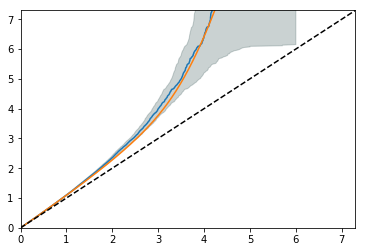

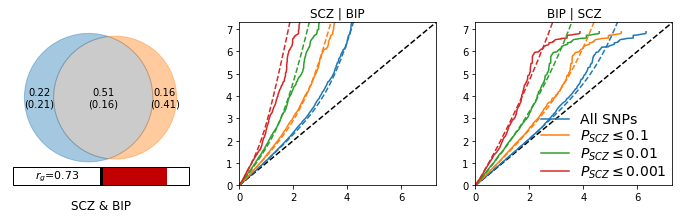

In [4]:
import json
data = json.loads(open('PGC_SCZ_2014_EUR_vs_PGC_BIP_2016.test.json').read())
plt.figure()
make_qq_plot(data['qqplot'][0], ci=True)

plt.figure(figsize=[12, 3])
plt.subplot(1,3,1)
make_venn_plot(data, flip=False, traits=['SCZ', 'BIP'])
plt.subplot(1,3,2)
make_strat_qq_plots(data, flip=False, traits=['SCZ', 'BIP'], do_legend=False)
plt.subplot(1,3,3)
make_strat_qq_plots(data, flip=True, traits=['BIP', 'SCZ'], do_legend=True)


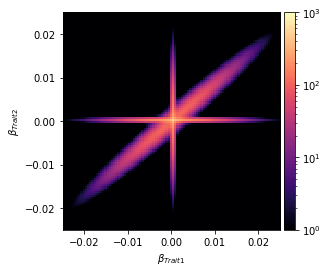

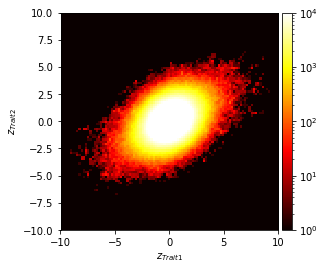

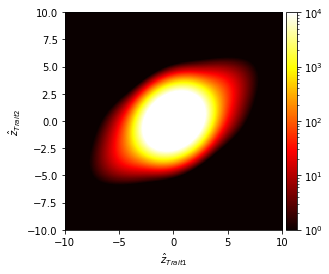

In [7]:
import pandas as pd
fname1 = '/home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_SCZ_2014_EUR.sumstats.gz'
fname2 = '/home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/nomhc/PGC_BIP_2016.sumstats.gz'
df1 = pd.read_table(fname1, delim_whitespace=True, usecols=['SNP', 'A1', 'A2', 'Z'])
df2 = pd.read_table(fname2, delim_whitespace=True, usecols=['SNP', 'A1', 'A2', 'Z'])
df = precimed.mixer.figures.merge_z_vs_z(df1, df2)

plt.figure()
precimed.mixer.figures.plot_causal_density(data)
plt.figure()
precimed.mixer.figures.plot_z_vs_z_data(df, plot_limits=10)
plt.figure()
precimed.mixer.figures.plot_predicted_zscore(data, len(df), plot_limits=10, flip=False)

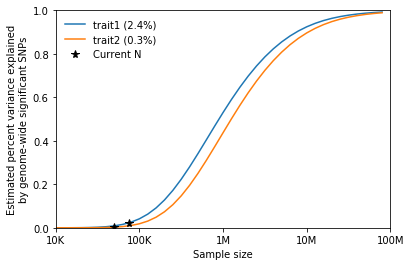

In [40]:
data1 = json.loads(open('PGC_SCZ_2014_EUR.test.json').read())
data2 = json.loads(open('PGC_BIP_2016.test.json').read())
precimed.mixer.figures.make_power_plot([data1, data2])

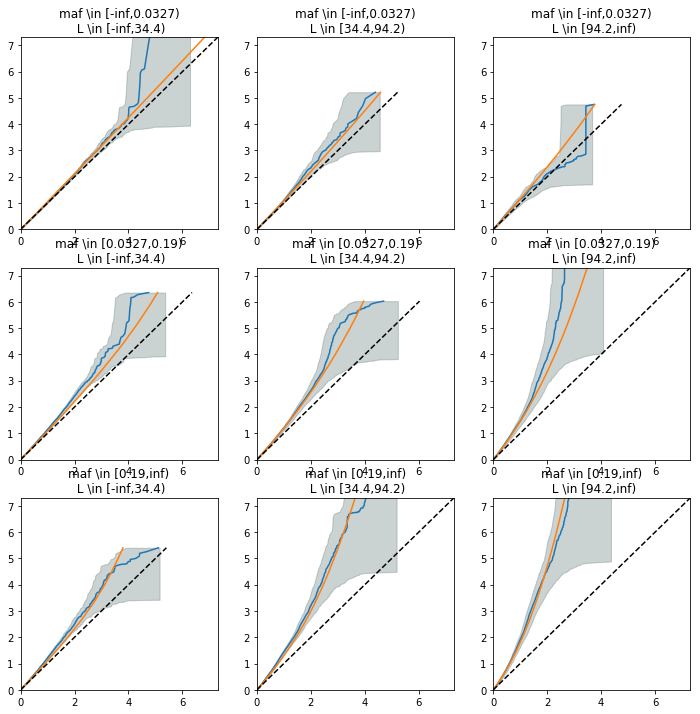

In [54]:
plt.figure(figsize=[12, 12])
for i in range(0, 3):
    for j in range(0, 3):
        plt.subplot(3,3,i*3+j+1)
        make_qq_plot(data['qqplot_bins'][i*3+j])
        plt.title(data['qqplot_bins'][i*3+j]['title'].replace(';', '\n'))

In [57]:
%load_ext autoreload
%autoreload 2
import argparse
import json
import os
import itertools

import numpy as np
from numpy import ma
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib_venn import venn2
import precimed
import precimed.mixer
import precimed.mixer.figures

from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal
files=glob.glob('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/*run3.test.json')
if 0:
    for fname in files:
        data = json.loads(open(fname).read())
        trait1, trait2 = tuple([a.split('_')[1] for a in fname.split('/')[-1].split('.')[0].split('_vs_')])
        plt.figure()
        plt.figure(figsize=[12, 3])
        plt.subplot(1,3,1)
        precimed.mixer.figures.make_venn_plot(data, flip=False, traits=[trait1, trait2])
        plt.subplot(1,3,2)
        precimed.mixer.figures.make_strat_qq_plots(data, flip=False, traits=[trait1, trait2], do_legend=False)
        plt.subplot(1,3,3)
        precimed.mixer.figures.make_strat_qq_plots(data, flip=True, traits=[trait2, trait1], do_legend=True)
        plt.savefig(fname.replace('.json', '.png'), bbox_inches='tight')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.6806531134392712 0.42850214416053833 0.8472322651218427 0.7636646048958523
0.35640014990263613 0.025383745360758683 0.40505187708029555 0.0302617418172466
0.28642575563948214 0.05557123859668319 0.29020433101820853 0.039759294443758066
0.16950420378139075 0.038498831531886414 0.2453691329610761 0.04614878749000128
0.005741824374982982 0.024271881242068288 0.005872570385093034 0.025238025386615338
-0.019741900094057577 0.005868601870015196 -0.09927190132618824 0.03128144536610123


<Figure size 432x288 with 0 Axes>

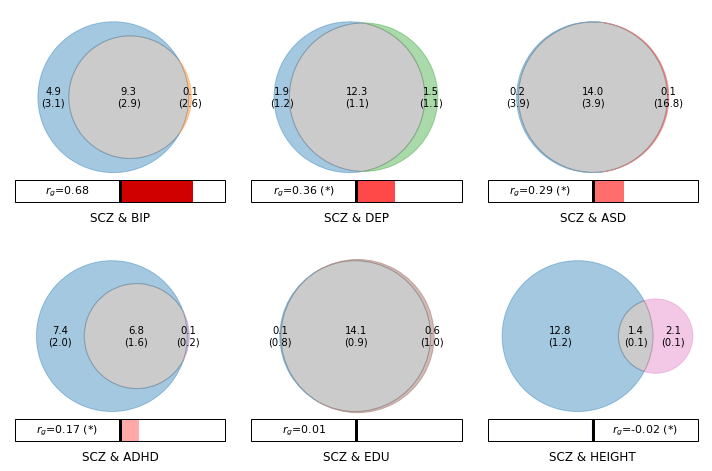

In [64]:
def make_venn_plot(data, flip=False, factor='K', traits=['Trait1', 'Trait2'], colors=[0, 1], max_size=None):
    cm = plt.cm.get_cmap('tab10')

    if factor=='K': scale_factor=1000
    elif factor=='': scale_factor=1
    else: raise(ValueError('Unknow factor: {}'.format(factor)))

    n1 = data['ci']['nc1@p9']['point_estimate']/scale_factor; n1_se = data['ci']['nc1@p9']['std']/scale_factor
    n2 = data['ci']['nc2@p9']['point_estimate']/scale_factor; n2_se = data['ci']['nc2@p9']['std']/scale_factor
    n12 = data['ci']['nc12@p9']['point_estimate']/scale_factor; n12_se = data['ci']['nc12@p9']['std']/scale_factor
    rg = data['ci']['rg']['point_estimate']; rg_se=data['ci']['rg']['std']
    rho_beta = data['ci']['rho_beta']['point_estimate']; rho_beta_se=data['ci']['rho_beta']['std']

    print(rg, rg_se, rho_beta, rho_beta_se)
    rg_sig = (np.abs(rg / rg_se) > 2.8653) # norminv(0.05/2/12)
    
    if max_size is None: max_size = n1+n2+n12
    if flip: n1, n2 = n2, n1; n1_se, n2_se = n2_se, n1_se
    f = lambda x: x if x < 7 else x+1

    v = venn2(subsets = (n1, n2, n12), normalize_to=(n1+n2+n12)/max_size, set_labels = ("", ""))
    v.get_patch_by_id('100').set_color(cm.colors[f(colors[0])])
    v.get_patch_by_id('010').set_color(cm.colors[f(colors[1])])
    v.get_patch_by_id('110').set_color(cm.colors[7])   
    formatter = '{:.2f}\n({:.2f})' if ((n1+n12+n2) < 1) else '{:.1f}\n({:.1f})' 
    v.get_label_by_id('100').set_text(formatter.format(n1, n1_se))
    v.get_label_by_id('010').set_text(formatter.format(n2, n2_se))
    v.get_label_by_id('110').set_text(formatter.format(n12, n12_se))

    plt.xlim([-0.75, 0.75]), plt.ylim([-0.7, 0.6])
    newline=''
    plt.title(traits[0] +' & ' + newline + traits[1], y=-0.13)

    clr = plt.cm.get_cmap('seismic')((rg+1)/2)
    plt.gca().add_patch(patches.Rectangle(((-abs(0.7*rg) if (rg < 0) else 0) , -0.7), abs(0.7 * rg), 0.15, fill=True, clip_on=False, color=clr))
    plt.gca().add_patch(patches.Rectangle((-0.70, -0.7), 1.4, 0.15, fill=False, clip_on=False))
    plt.gca().add_patch(patches.Rectangle((0, -0.7), 0, 0.15, fill=False, clip_on=False, linewidth=3))
    plt.gca().text(-0.35 if (rg>0) else 0.35, -0.7+0.15/2, '$r_g$={:.2f}{}'.format(rg, ' (*)' if rg_sig else ''), fontsize=11, horizontalalignment='center',         verticalalignment='center')

plt.figure()
plt.figure(figsize=[10, 7])
traits=[
 'PGC_BIP_2016',
 'PGC_MDD_2018_Howard_no23andMe',
 'PGC_ASD_2017_iPSYCH',
 'PGC_ADHD_2017_EUR',
 #'CTG_COG_2018',
 'SSGAC_EDU_2018_no23andMe',
 #'CTG_NEUR_2018_no23andMe',
 #'UKB_LONELY_2018_Loneliness',
 #'ICC_CANNABIS_2018_UKB',
 #'GSCAN_SMOKE_2019_CigarettesPerDay', 
 #'GSCAN_DRINK_2019_DrinksPerWeek',
 'GIANT_HEIGHT_2018_UKB',
]

do_flip = False # lucky coincidence - CLOZUK is lowest alphabetically, no need to swap left and right on venn diagram
fname_pattern = '/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/CLOZUK_SCZ_2018_withPGC_vs_{}.outtag=run3.test.json'
fname_fit_pattern = '/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/CLOZUK_SCZ_2018_withPGC_vs_{}.outtag=run3.fit.json'
if 1:
    for trait_index, trait in enumerate(traits): # sorted(files):
        fname=fname_pattern.format(trait)
        trait1, trait2 = tuple([a.split('_')[1] for a in fname.split('/')[-1].split('.')[0].split('_vs_')])
        data = json.loads(open(fname).read())
        data_fit = json.loads(open(fname_fit_pattern.format(trait)).read())
        data['ci'] = data_fit['ci']
        plt.subplot(2,3,trait_index+1)
        
        trait2=trait2.replace('MDD', 'DEP').replace('COG', 'INT').replace('SMOKE', 'TOBACCO').replace('DRINK', 'ALCOHOL')
        make_venn_plot(data, flip=do_flip, max_size=18, traits=[trait1, trait2], colors=[0,1+(trait_index%8)])
    plt.tight_layout()
    #plt.savefig('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/png_NCp319/CLOZUK_SCZ_2018_withPGC.png', bbox_inches='tight')
    #plt.savefig('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/png_NCp319/CLOZUK_SCZ_2018_withPGC.svg', bbox_inches='tight')    

if 0:
    for fig_index, traits in enumerate([traits[:6], traits[6:]]):
        plt.figure(figsize=[12, 3*12])
        for trait_index, trait in enumerate(traits): # sorted(files):
            fname=fname_pattern.format(trait)
            trait1, trait2 = tuple([a.split('_')[1] for a in fname.split('/')[-1].split('.')[0].split('_vs_')])
            data = json.loads(open(fname).read())
            plt.subplot(12,3,1+trait_index*3)
            precimed.mixer.figures.make_venn_plot(data, flip=False, traits=[trait1, trait2])
            plt.subplot(12,3,2+trait_index*3)
            precimed.mixer.figures.make_strat_qq_plots(data, flip=False, traits=[trait1, trait2], do_legend=False)
            plt.subplot(12,3,3+trait_index*3)
            precimed.mixer.figures.make_strat_qq_plots(data, flip=True, traits=[trait2, trait1], do_legend=True)
        plt.savefig('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/png_NCp319/CLOZUK_SCZ_2018_withPGC.qq.{}.png'.format(fig_index), bbox_inches='tight')
        plt.savefig('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/png_NCp319/CLOZUK_SCZ_2018_withPGC.qq.{}.svg'.format(fig_index), bbox_inches='tight')

if 1:
    #'PGC_SCZ_0418b PGC_SCZ_0518_EUR PGC_SCZ_2014_EUR'
    fname='/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/{}.outtag=run1.testR3.json'
    traits1 = 'CLOZUK_SCZ_2018_withPGC PGC_BIP_2016 PGC_MDD_2018_Howard_no23andMe PGC_ASD_2017_iPSYCH PGC_ADHD_2017_EUR SSGAC_EDU_2018_no23andMe GIANT_HEIGHT_2018_UKB'
    traits1_names = 'SCZ BIP DEP ASD ADHD EDU HEIGHT'
    traits1_colors = [0,1,2,3,4,5,6]

    #traits1 = 'CLOZUK_SCZ_2018_withPGC PGC_BIP_2016 PGC_MDD_2018_Howard_no23andMe PGC_ASD_2017_iPSYCH PGC_ADHD_2017_EUR CTG_COG_2018 SSGAC_EDU_2018_no23andMe'
    #traits1_names = 'SCZ BIP DEP ASD ADHD INT EDU'
    #traits1_colors = [0,1,2,3,4,5,6]
    #traits2 = 'CLOZUK_SCZ_2018_withPGC CTG_NEUR_2018_no23andMe UKB_LONELY_2018_Loneliness ICC_CANNABIS_2018_UKB GSCAN_SMOKE_2019_CigarettesPerDay GSCAN_DRINK_2019_DrinksPerWeek GIANT_HEIGHT_2018_UKB'
    #traits2_names = 'SCZ NEUR LONELY CANNABIS TOBACCO ALCOHOL HEIGHT'
    #traits2_colors = [0,8,9,1,2,3,4,5]
    #for traits, traits_names, out, color in zip([traits1, traits2], [traits1_names, traits2_names], ['1', '2'], [traits1_colors, traits2_colors]):
    for traits, traits_names, out, color in zip([traits1], [traits1_names], ['3'], [traits1_colors]):
        data = [json.loads(open(fname.format(x)).read()) for x in traits.split()]
        plt.figure()
        precimed.mixer.figures.make_power_plot(data,traits=traits_names.split(),colors=color)
        plt.savefig('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/png_NCp319/CLOZUK_SCZ_2018_withPGC_traits{}.power.png'.format(out), bbox_inches='tight')
        plt.savefig('/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/png_NCp319/CLOZUK_SCZ_2018_withPGC.traits{}.power.svg'.format(out), bbox_inches='tight')


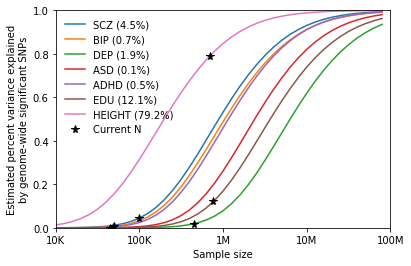

In [ ]:
fname_pattern = '/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_aug2019/CLOZUK_SCZ_2018_withPGC_vs_{}.outtag=run3.fit.json'